# Ksn plotting 

Script to plot the graphs for ksn distortion.
Author: Marina Ruiz Sánchez-Oro

In [1]:
import numpy as np
import pandas as pd

import zarr
import matplotlib.pyplot as plt
import os
import helplotlib as hpl
import lsdtopytools as lsd
import cmcrameri.cm as cmc
import seaborn as sns
import re

import pickle
import itertools
from matplotlib.offsetbox import AnchoredText

os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE" # Keep this or the code breaks because the HDF files aren't closed properly.


In [2]:
def format_string(string_to_format):
    formatted_string = string_to_format.replace("_", " ")
    formatted_string = re.sub(r"([0-9]+(\.[0-9]+)?)",r" \1 ", formatted_string).strip()
    return formatted_string.capitalize()

In [3]:
base_path = '/exports/csce/datastore/geos/users/s1440040/projects/phd-fastscape/phd-fastscape/model_outputs_for_statistics/'

file_name = 'ksn_ratios_all_grad_ss_discharge.csv'

ksn_dataframe = pd.read_csv(base_path+file_name)

In [4]:
gradient_names = list(ksn_dataframe.rain_gradient)


In [5]:
ksn_dataframe_no_grad = ksn_dataframe.drop(['rain_gradient'], axis=1)

In [6]:
overall_max = ksn_dataframe_no_grad.max(axis=1).max()
overall_min = ksn_dataframe_no_grad.min(axis=1).min()
overall_max = overall_max + 0.02
overall_min = overall_min - 0.02


In [8]:
min_max_plot = max(abs(1-overall_max), abs(1-overall_min))

In [9]:
max_plot = 1+min_max_plot
min_plot = 1-min_max_plot

In [11]:
cmap = cmc.berlin

# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
upper_color_discharge = 0
lower_color_discharge = 0.5
num_colors =  11 # len(self.data.columns)
colors_discharge = cmap(np.linspace(lower_color_discharge, upper_color_discharge, num_colors))
colors_discharge = colors_discharge[::-1]

upper_color_da = 0.5
lower_color_da = 1
colors_da = cmap(np.linspace(lower_color_da, upper_color_da, num_colors))

In [12]:
ksn_dataframe = ksn_dataframe.reindex(columns=['rain_gradient','ksn_ratio_no_rain', 'ksn_ratio_rain', 'ksn_ratio_theta_45', 'ksn_ratio_theta_best'])

In [ ]:
hpl.mkfig_simple_bold(fontsize_major = 21, fontsize_minor= 14, family = "DejaVu Sans" , figsize = (10,8))


In [14]:
# plot all figures in one go
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlesize"] = 24
import matplotlib.patches as mpl_patches
base_path = '/exports/csce/datastore/geos/users/s1440040/projects/phd-fastscape/phd-fastscape/model_outputs_for_statistics/'
y_labels = [
    r'$\frac{k_{{sn}}\;{{(\theta=\theta_{{best}})}}}{k_{{sn}}{{(\theta=0.45)}}}$',
    r'$\frac{k_{{sn-q}}\;{{(\theta=\theta_{{best}})}}}{k_{{sn-q}}{{(\theta=0.45)}}}$',
    r'$\frac{k_{{sn}}{{(\theta=0.45)}}}{k_{{sn-q}}{{(\theta=0.45)}}}$',
    r'$\frac{k_{{sn}}\;{{(\theta=\theta_{{best}})}}}{k_{{sn-q}}\;{{(\theta=\theta_{{best}})}}}$']
case_labels = [
    r'Case $i_{{A}}$',
    r'Case $i_{{Q}}$',
    r'Case ii',
    r'Case iii'
]
da_or_discharge = ['da', 'discharge']
incision_rule = [r'$Drainage\;Area$', r'$Discharge$']

ss_count = 0

min_max_values = []


legend_properties = {'weight':'bold', 'size':24}


ss_min = []
ss_max = []
def plot_all_plots(my_axs, ss_case, label_count, col_name, subplot_letter):
    if ss_case == 'da':
        color_palette = colors_da
    else:
        color_palette = colors_discharge
    file_name = f'ksn_ratios_all_grad_ss_{ss_case}.csv'
    ksn_dataframe = pd.read_csv(base_path+file_name)
    gradient_names = list(ksn_dataframe.rain_gradient)
    ksn_dataframe = ksn_dataframe.reindex(columns=['rain_gradient','ksn_ratio_no_rain', 'ksn_ratio_rain', 'ksn_ratio_theta_45', 'ksn_ratio_theta_best'])
    column_names = ksn_dataframe.columns
    #print(column_names)
    #print(f'{col_name}:Min {ksn_dataframe[col_name].min()}, Max {ksn_dataframe[col_name].max()}')
    #print(f'{ksn_dataframe[col_name].min()},{ksn_dataframe[col_name].max()}')
    ss_min.append(round(abs(1-ksn_dataframe[column_names[col_name]].min()), 2))
    ss_max.append(round(abs(1-ksn_dataframe[column_names[col_name]].max()),2))

    #print(col_name, ss_case)
    #fig, ax = hpl.mkfig_simple_bold(fontsize_major = 21, fontsize_minor= 14, family = "DejaVu Sans" , figsize = (7,5))
    graph = sns.stripplot(ax =my_axs, x = ksn_dataframe['rain_gradient'],
                  y = ksn_dataframe[column_names[col_name]] , 
                  data = ksn_dataframe,
                  edgecolor="black",
                  alpha=1,
                  s=15,
                  linewidth=1.0,
                  palette = color_palette)
    my_axs.set_ylim([min_plot, max_plot])

    my_axs.set_xlabel('Rainfall Gradient (m/yr)', size=18)
    my_axs.yaxis.set_tick_params(labelsize=18)
    my_axs.set_ylabel(r'$k_{sn}\; Distortion$', size=18)
    my_axs.legend([],[], frameon=False)
    #plt.title( f'$\;Incision:$'+incision_rule[ss_count]+'. '+r'$Homogeneous\;Lithology$', weight='bold')

    plt.scatter([], [])

        # create a list with two empty handles (or more if needed)
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                     lw=0, alpha=0)] #* 2

    # create the corresponding number of labels (= the text you want to display)
    labels = []
    labels.append(y_labels[label_count])
    my_axs.legend(handles, labels, loc='best', fontsize='x-large', 
              fancybox=True, framealpha=0.7, 
              handlelength=0, handletextpad=0, prop=legend_properties)


    plt.ticklabel_format(axis='y',useOffset=False)
    graph.axhline(1.000, linewidth=1, color='black')
    my_axs.text(-0.15, 0.9, subplot_letter, transform=my_axs.transAxes, 
            size=21, weight='bold')

    my_axs.text(0.8, 0.1, case_labels[label_count], transform=my_axs.transAxes,size=21, color='black',bbox=dict(boxstyle="round",
                   ec='Black',
                   fc='White', alpha=0.5
                   ))
    my_axs.set_xticklabels(ksn_dataframe['rain_gradient'].unique(), fontsize=18)


    min_max_values.append(ss_min)
    min_max_values.append(ss_max)




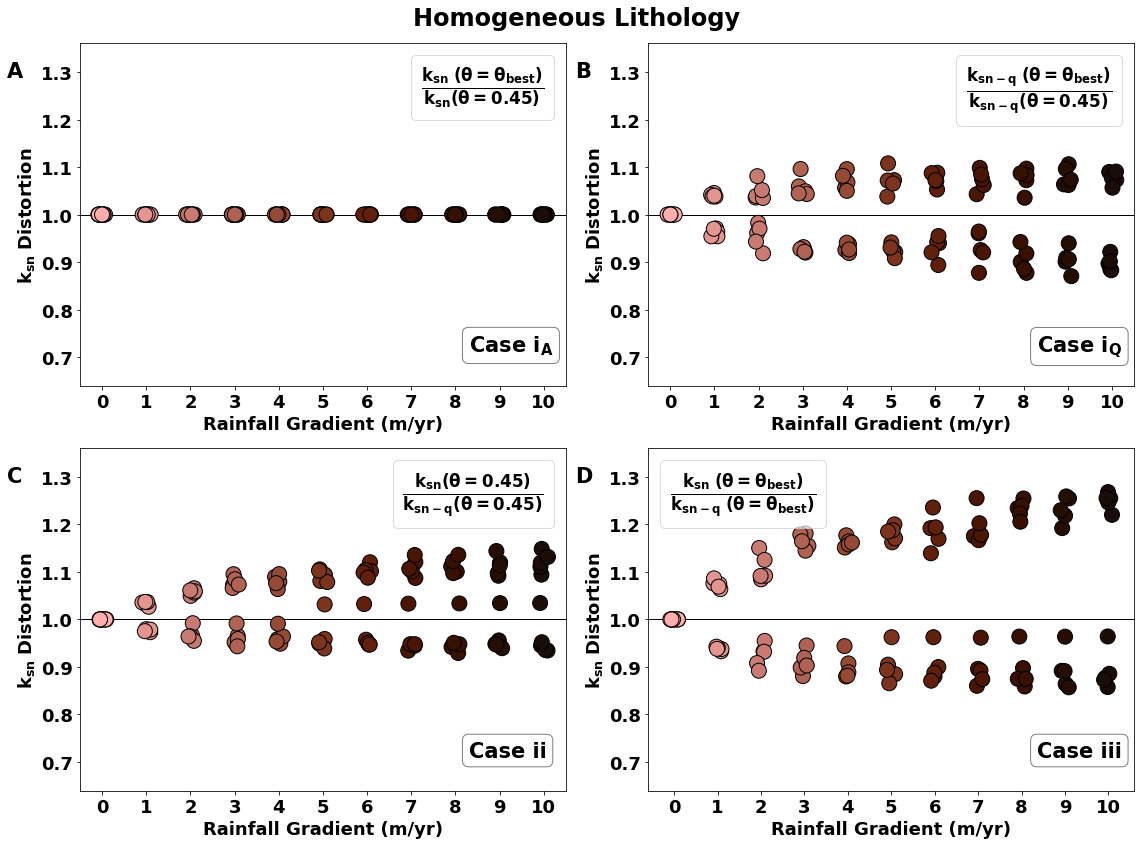

In [15]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
plot_all_plots(axs[0][0],'da', 0, 1, 'A')
plot_all_plots(axs[0][1],'da', 1, 2, 'B')
plot_all_plots(axs[1][0],'da', 2, 3, 'C')
plot_all_plots(axs[1][1],'da', 3, 4, 'D')
fig.suptitle('Homogeneous Lithology', fontweight='bold', fontsize=24) # or plt.suptitle('Main title')

plt.tight_layout()
plt.savefig(base_path + f'ksn_distortion_homogeneous_da' +'.pdf', dpi = 400)

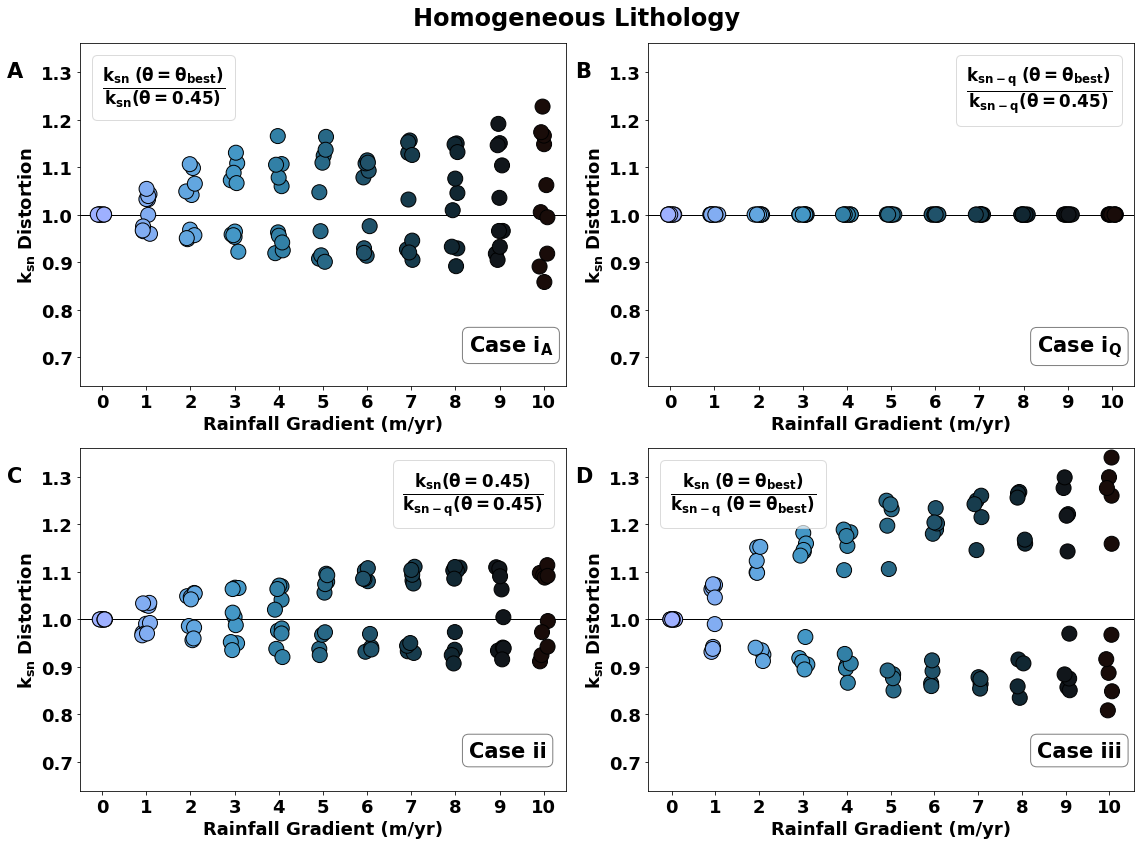

In [16]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
plot_all_plots(axs[0][0],'discharge', 0, 1, 'A')
plot_all_plots(axs[0][1],'discharge', 1, 2, 'B')
plot_all_plots(axs[1][0],'discharge', 2, 3, 'C')
plot_all_plots(axs[1][1],'discharge', 3, 4, 'D')
fig.suptitle('Homogeneous Lithology', fontweight='bold', fontsize=24) # or plt.suptitle('Main title')

plt.tight_layout()
plt.savefig(base_path + f'ksn_distortion_homogeneous_discharge' +'.pdf', dpi = 400)

In [ ]:
# ORDER OF VALUES
# da - min, max
# discharge - min, max

In [ ]:
df= pd.DataFrame(min_max_values, columns =ksn_dataframe.columns[1:])
ss_type = ['da', 'da', 'discharge', 'discharge']
min_or_max = ['min', 'max', 'min', 'max']
df['min_or_max'] = min_or_max 
df['steady_state'] = ss_type
df.to_csv('min_max_ksn_0_45_homogeneous_litho.csv')